In [1]:
'''

This code is part of the SIPN2 project focused on improving sub-seasonal to seasonal predictions of Arctic Sea Ice. 
If you use this code for a publication or presentation, please cite the reference in the README.md on the
main page (https://github.com/NicWayand/ESIO). 

Questions or comments should be addressed to nicway@uw.edu

Copyright (c) 2018 Nic Wayand

GNU General Public License v3.0


'''

'''
Plot exetent/area from observations and models (past and future)
'''

%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt, mpld3
from collections import OrderedDict
import itertools
import numpy as np
import numpy.ma as ma
import pandas as pd
import struct
import os
import xarray as xr
import glob
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')


from esio import EsioData as ed
from esio import ice_plot
from esio import metrics

# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  F

In [2]:
# Plotting Info
runType = 'forecast'
variables = ['sic'] #, 'hi'
metric1 = 'extent'

In [3]:
# Initialization times to plot
cd = datetime.datetime.now()
cd = datetime.datetime(cd.year, cd.month, cd.day) # Assumes hours 00, min 00
SD = cd - datetime.timedelta(days=90)
# SD = cd - datetime.timedelta(days=4*365)

# ED = cd + datetime.timedelta(days=365)

In [4]:
# Info about models runs
# icePredicted = {'gfdlsipn':True, 'piomas':True, 'yopp':True, 'bom':False, 'cma':True, 'ecmwf':True, 
#               'hcmr':False, 'isaccnr':False, 'jma':False, 'metreofr':True, 'ukmo':True, 'eccc':False, 
#               'kma':True, 'ncep':True, 'ukmetofficesipn':True, 'ecmwfsipn':True}
# biasCorrected = 

In [5]:
#############################################################
# Load in Data
#############################################################
E = ed.EsioData.load()

In [6]:
# Load obs
import timeit
start_time = timeit.default_timer()
ds_obs = xr.open_mfdataset(E.obs['NSIDC_0081']['sipn_nc']+'/*.nc', concat_dim='time', autoclose=True)#,
print(timeit.default_timer() - start_time)

208.6680693360977


In [7]:
# Load in regional data
# Note minor -0.000004 degree differences in latitude
ds_region = xr.open_dataset(os.path.join(E.grid_dir, 'sio_2016_mask_Update.nc'))

In [8]:
cdate = datetime.datetime.now()


# Plot Raw extents and only models that predict sea ice

Sea of Okhotsk
dampedAnomalyTrend
1.957814158173278  seconds.
gfdlsipn
0.42319897818379104  seconds.
piomas
yopp
2.7689304761588573  seconds.
ukmetofficesipn
15.54108339897357  seconds.
ecmwfsipn
5.5989546100609004  seconds.
ecmwf
0.32359577203169465  seconds.
metreofr
0.11270787380635738  seconds.
ukmo
1.0555967909749597  seconds.
kma
1.146307700080797  seconds.
ncep
0.9617723510600626  seconds.
usnavysipn
0.0028930441476404667  seconds.
usnavyncep
1.0096747681964189  seconds.
rasmesrl
3.267943561077118  seconds.
noaasipn
0.0380326968152076  seconds.
noaasipn_ext
usnavygofs
6.605510603170842  seconds.
modcansipns_3
0.021933678071945906  seconds.
modcansipns_4
0.023065306013450027  seconds.
uclsipn
0.019382056081667542  seconds.
szapirosipn
0.010562406154349446  seconds.
awispin
0.025779430055990815  seconds.
nicosipn
0.007915227208286524  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Bering
dampedAnomalyTrend
1.8143604048527777  seconds.
gfdlsipn
0.4780951419379562  seconds.
piomas
yopp
2.898232474923134  seconds.
ukmetofficesipn
14.567659082822502  seconds.
ecmwfsipn
5.529671041062102  seconds.
ecmwf
0.3641913188621402  seconds.
metreofr
0.12663423595950007  seconds.
ukmo
1.139083884190768  seconds.
kma
1.0943479998968542  seconds.
ncep
0.8930367229040712  seconds.
usnavysipn
0.004032869823276997  seconds.
usnavyncep
1.0436620200052857  seconds.
rasmesrl
3.2151108998805285  seconds.
noaasipn
0.04032437899149954  seconds.
noaasipn_ext
usnavygofs
6.934952459065244  seconds.
modcansipns_3
0.020459799095988274  seconds.
modcansipns_4
0.020662272116169333  seconds.
uclsipn
0.018336869077757  seconds.
szapirosipn
0.012585119111463428  seconds.
awispin
0.02204016107134521  seconds.
nicosipn
0.008611019933596253  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Hudson Bay
dampedAnomalyTrend
1.975536271929741  seconds.
gfdlsipn
0.45286303386092186  seconds.
piomas
yopp
3.090998484985903  seconds.
ukmetofficesipn
15.015193336177617  seconds.
ecmwfsipn
5.758000371046364  seconds.
ecmwf
0.4608057129662484  seconds.
metreofr
0.1752596611622721  seconds.
ukmo
1.276103527052328  seconds.
kma
1.2216041279025376  seconds.
ncep
1.3672197971027344  seconds.
usnavysipn
0.003082331968471408  seconds.
usnavyncep
0.8503587471786886  seconds.
rasmesrl
2.7767920498736203  seconds.
noaasipn
0.037826105020940304  seconds.
noaasipn_ext
usnavygofs
5.45125646982342  seconds.
modcansipns_3
0.020241783931851387  seconds.
modcansipns_4
0.02072552195750177  seconds.
uclsipn
0.018039535032585263  seconds.
szapirosipn
0.011623501079156995  seconds.
awispin
0.01936719403602183  seconds.
nicosipn
0.007199216866865754  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


St John
dampedAnomalyTrend
1.4266490468289703  seconds.
gfdlsipn
0.3096536728553474  seconds.
piomas
yopp
2.084119535051286  seconds.
ukmetofficesipn
13.674911799840629  seconds.
ecmwfsipn
5.237729229964316  seconds.
ecmwf
0.23571851011365652  seconds.
metreofr
0.10561194596812129  seconds.
ukmo
0.7933916479814798  seconds.
kma
0.7548080831766129  seconds.
ncep
0.7394014899618924  seconds.
usnavysipn
0.003763121087104082  seconds.
usnavyncep
0.7310185609385371  seconds.
rasmesrl
3.642645529936999  seconds.
noaasipn
0.049061586847528815  seconds.
noaasipn_ext
usnavygofs
7.152070618933067  seconds.
modcansipns_3
0.02133109699934721  seconds.
modcansipns_4
0.02850391808897257  seconds.
uclsipn
0.01873310888186097  seconds.
szapirosipn
0.012023376068100333  seconds.
awispin
0.020749635994434357  seconds.
nicosipn
0.007297602016478777  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Baffin Bay
dampedAnomalyTrend
1.8049936378374696  seconds.
gfdlsipn
0.4538552740123123  seconds.
piomas
yopp
3.758299347013235  seconds.
ukmetofficesipn
14.45646771416068  seconds.
ecmwfsipn
5.773886386072263  seconds.
ecmwf
0.46261714096181095  seconds.
metreofr
0.20994806685484946  seconds.
ukmo
1.2504536979831755  seconds.
kma
1.4596751139033586  seconds.
ncep
1.5033407099545002  seconds.
usnavysipn
0.0038571679033339024  seconds.
usnavyncep
1.2134999590925872  seconds.
rasmesrl
3.822033506119624  seconds.
noaasipn
0.03687528916634619  seconds.
noaasipn_ext
usnavygofs
7.500192071078345  seconds.
modcansipns_3
0.021390496054664254  seconds.
modcansipns_4
0.0253078390378505  seconds.
uclsipn
0.018727966118603945  seconds.
szapirosipn
0.01207827404141426  seconds.
awispin
0.023911674041301012  seconds.
nicosipn
0.007597308838739991  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


East Greenland Sea
dampedAnomalyTrend
1.694449826143682  seconds.
gfdlsipn
0.4959393369499594  seconds.
piomas
yopp
3.320997114991769  seconds.
ukmetofficesipn
14.76235387288034  seconds.
ecmwfsipn
6.2084015239961445  seconds.
ecmwf
0.43864766205661  seconds.
metreofr
0.20198617479763925  seconds.
ukmo
1.4206675379537046  seconds.
kma
1.44232649798505  seconds.
ncep
1.4129049801267684  seconds.
usnavysipn
0.0040749008767306805  seconds.
usnavyncep
1.2219797619618475  seconds.
rasmesrl
2.8498200429603457  seconds.
noaasipn
0.031394416000694036  seconds.
noaasipn_ext
usnavygofs
5.785186706809327  seconds.
modcansipns_3
0.02007508696988225  seconds.
modcansipns_4
0.0210477439686656  seconds.
uclsipn
0.018234807066619396  seconds.
szapirosipn
0.011229349998757243  seconds.
awispin
0.01997042098082602  seconds.
nicosipn
0.006926227826625109  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Barents Sea
dampedAnomalyTrend
1.768662170972675  seconds.
gfdlsipn
0.42719969688914716  seconds.
piomas
yopp
2.452796026133001  seconds.
ukmetofficesipn
13.704137410968542  seconds.
ecmwfsipn
5.181963578099385  seconds.
ecmwf
0.34541569906286895  seconds.
metreofr
0.12968262215144932  seconds.
ukmo
0.9867783889640123  seconds.
kma
1.069728520931676  seconds.
ncep
1.4980707601644099  seconds.
usnavysipn
0.00375036196783185  seconds.
usnavyncep
0.8809449439868331  seconds.
rasmesrl
2.574077690951526  seconds.
noaasipn
0.02914977492764592  seconds.
noaasipn_ext
usnavygofs
6.49801609502174  seconds.
modcansipns_3
0.02117335400544107  seconds.
modcansipns_4
0.020089269848540425  seconds.
uclsipn
0.017402609810233116  seconds.
szapirosipn
0.010429769987240434  seconds.
awispin
0.019693230045959353  seconds.
nicosipn
0.007030887063592672  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Kara Sea
dampedAnomalyTrend
1.4537052321247756  seconds.
gfdlsipn
0.3344785519875586  seconds.
piomas
yopp
2.47214570408687  seconds.
ukmetofficesipn
13.378616145113483  seconds.
ecmwfsipn
4.802427327027544  seconds.
ecmwf
0.3921959660947323  seconds.
metreofr
0.14624702697619796  seconds.
ukmo
1.0638816270511597  seconds.
kma
1.0879294129554182  seconds.
ncep
1.075582057936117  seconds.
usnavysipn
0.00319080613553524  seconds.
usnavyncep
0.9202573881484568  seconds.
rasmesrl
2.9935356290079653  seconds.
noaasipn
0.04030962102115154  seconds.
noaasipn_ext
usnavygofs
5.6681980369612575  seconds.
modcansipns_3
0.02054729894734919  seconds.
modcansipns_4
0.02019272604957223  seconds.
uclsipn
0.018736019963398576  seconds.
szapirosipn
0.010634366888552904  seconds.
awispin
0.019239068031311035  seconds.
nicosipn
0.008028771029785275  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Laptev Sea
dampedAnomalyTrend
1.4860135938506573  seconds.
gfdlsipn
0.3827205989509821  seconds.
piomas
yopp
2.5748780500143766  seconds.
ukmetofficesipn
13.459411415969953  seconds.
ecmwfsipn
5.081667995080352  seconds.
ecmwf
0.35019620996899903  seconds.
metreofr
0.16600148612633348  seconds.
ukmo
1.1377202630974352  seconds.
kma
1.1339337828103453  seconds.
ncep
1.18126030289568  seconds.
usnavysipn
0.0038064701948314905  seconds.
usnavyncep
0.9450707428622991  seconds.
rasmesrl
2.9291567669715732  seconds.
noaasipn
0.030973244924098253  seconds.
noaasipn_ext
usnavygofs
6.50300168688409  seconds.
modcansipns_3
0.0201024878770113  seconds.
modcansipns_4
0.020887592108920217  seconds.
uclsipn
0.01911888807080686  seconds.
szapirosipn
0.011360371951013803  seconds.
awispin
0.019358124816790223  seconds.
nicosipn
0.007077594054862857  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


East Siberian Sea
dampedAnomalyTrend
1.493827223079279  seconds.
gfdlsipn
0.378288087900728  seconds.
piomas
yopp
2.7806084419135004  seconds.
ukmetofficesipn
13.466131068998948  seconds.
ecmwfsipn
5.314001824008301  seconds.
ecmwf
0.4360229189042002  seconds.
metreofr
0.2088541288394481  seconds.
ukmo
1.3362243049778044  seconds.
kma
1.0894063219893724  seconds.
ncep
1.0565117709338665  seconds.
usnavysipn
0.0038689090870320797  seconds.
usnavyncep
0.8908350740093738  seconds.
rasmesrl
2.6451729761902243  seconds.
noaasipn
0.03190489299595356  seconds.
noaasipn_ext
usnavygofs
5.342893393011764  seconds.
modcansipns_3
0.02043227106332779  seconds.
modcansipns_4
0.02014543511904776  seconds.
uclsipn
0.01737670903094113  seconds.
szapirosipn
0.01134124817326665  seconds.
awispin
0.019552117912098765  seconds.
nicosipn
0.007208911934867501  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Chukchi Sea
dampedAnomalyTrend
1.4171027219854295  seconds.
gfdlsipn
0.3945814201142639  seconds.
piomas
yopp
2.682585425907746  seconds.
ukmetofficesipn
13.595921829110011  seconds.
ecmwfsipn
6.004742195131257  seconds.
ecmwf
0.31399119389243424  seconds.
metreofr
0.16298614395782351  seconds.
ukmo
1.1752904690802097  seconds.
kma
1.1231228031683713  seconds.
ncep
1.1726979140657932  seconds.
usnavysipn
0.0038525669369846582  seconds.
usnavyncep
0.9476377300452441  seconds.
rasmesrl
2.8506278300192207  seconds.
noaasipn
0.031761822989210486  seconds.
noaasipn_ext
usnavygofs
6.225109247956425  seconds.
modcansipns_3
0.020435196114704013  seconds.
modcansipns_4
0.021442112047225237  seconds.
uclsipn
0.017817263025790453  seconds.
szapirosipn
0.01050876290537417  seconds.
awispin
0.019615626893937588  seconds.
nicosipn
0.007862950908020139  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Beaufort Sea
dampedAnomalyTrend
1.455814725952223  seconds.
gfdlsipn
0.38415921991690993  seconds.
piomas
yopp
2.5623794740531594  seconds.
ukmetofficesipn
13.733580461004749  seconds.
ecmwfsipn
5.028067411854863  seconds.
ecmwf
0.34157919487915933  seconds.
metreofr
0.15150155103765428  seconds.
ukmo
0.9774710438214242  seconds.
kma
1.0430392678827047  seconds.
ncep
1.0666548882145435  seconds.
usnavysipn
0.003182588145136833  seconds.
usnavyncep
0.8919420870952308  seconds.
rasmesrl
2.802328929072246  seconds.
noaasipn
0.03796507208608091  seconds.
noaasipn_ext
usnavygofs
6.736344882054254  seconds.
modcansipns_3
0.022936441004276276  seconds.
modcansipns_4
0.02103803982026875  seconds.
uclsipn
0.018543594051152468  seconds.
szapirosipn
0.010792534099891782  seconds.
awispin
0.02040008595213294  seconds.
nicosipn
0.007804153952747583  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Canadian Islands
dampedAnomalyTrend
1.4796807439997792  seconds.
gfdlsipn
0.39843469904735684  seconds.
piomas
yopp
2.8402809670660645  seconds.
ukmetofficesipn
13.39440411888063  seconds.
ecmwfsipn
4.793532317969948  seconds.
ecmwf
0.3623534329235554  seconds.
metreofr
0.14649979816749692  seconds.
ukmo
0.985988425090909  seconds.
kma
0.9814782438334078  seconds.
ncep
1.0502099690493196  seconds.
usnavysipn
0.0028442591428756714  seconds.
usnavyncep
0.9261008461471647  seconds.
rasmesrl
3.0713040879927576  seconds.
noaasipn
0.039123065769672394  seconds.
noaasipn_ext
usnavygofs
7.439043494872749  seconds.
modcansipns_3
0.02204640698619187  seconds.
modcansipns_4
0.02308760304003954  seconds.
uclsipn
0.020337510155513883  seconds.
szapirosipn
0.011095672147348523  seconds.
awispin
0.020922441966831684  seconds.
nicosipn
0.007515096105635166  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Central Arctic
dampedAnomalyTrend
1.7707840111106634  seconds.
gfdlsipn
0.43879877706058323  seconds.
piomas
yopp
3.1316699960734695  seconds.
ukmetofficesipn
13.887826535152271  seconds.
ecmwfsipn
5.969985822914168  seconds.
ecmwf
0.35832845605909824  seconds.
metreofr
0.1726895091123879  seconds.
ukmo
1.1606417598668486  seconds.
kma
1.1506119268015027  seconds.
ncep
1.1476921760477126  seconds.
usnavysipn
0.0038914240431040525  seconds.
usnavyncep
0.8964574949350208  seconds.
rasmesrl
3.16864671302028  seconds.
noaasipn
0.03842047112993896  seconds.
noaasipn_ext
usnavygofs
5.852279142010957  seconds.
modcansipns_3
0.021701102843508124  seconds.
modcansipns_4
0.026454708073288202  seconds.
uclsipn
0.019682791084051132  seconds.
szapirosipn
0.010601760819554329  seconds.
awispin
0.020173021825030446  seconds.
nicosipn
0.007030181819573045  seconds.
MME
MME_NEW
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/core.py:137: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


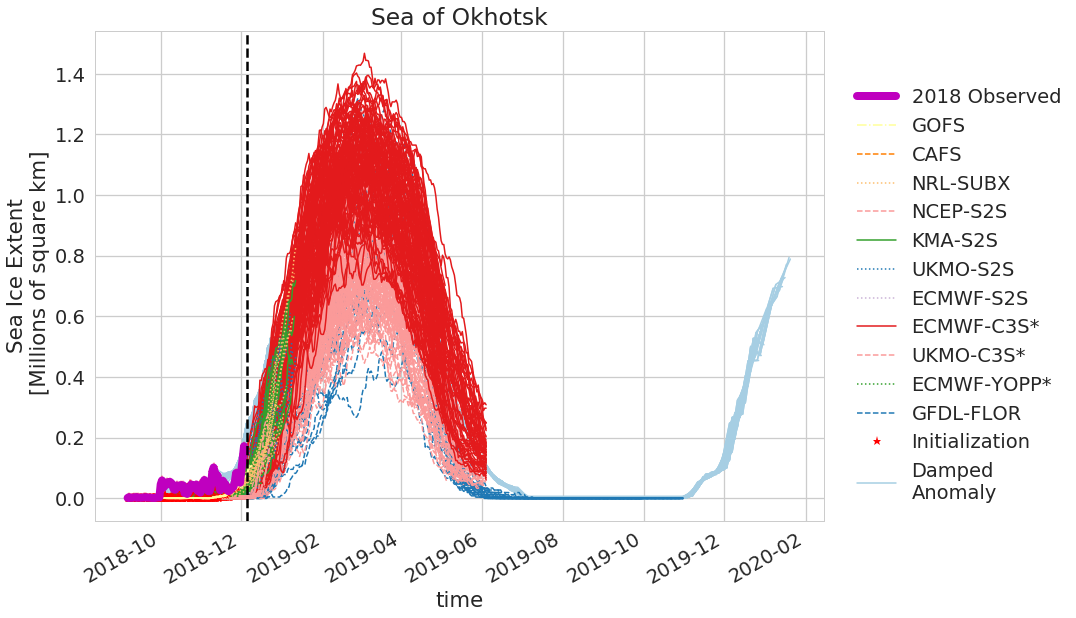

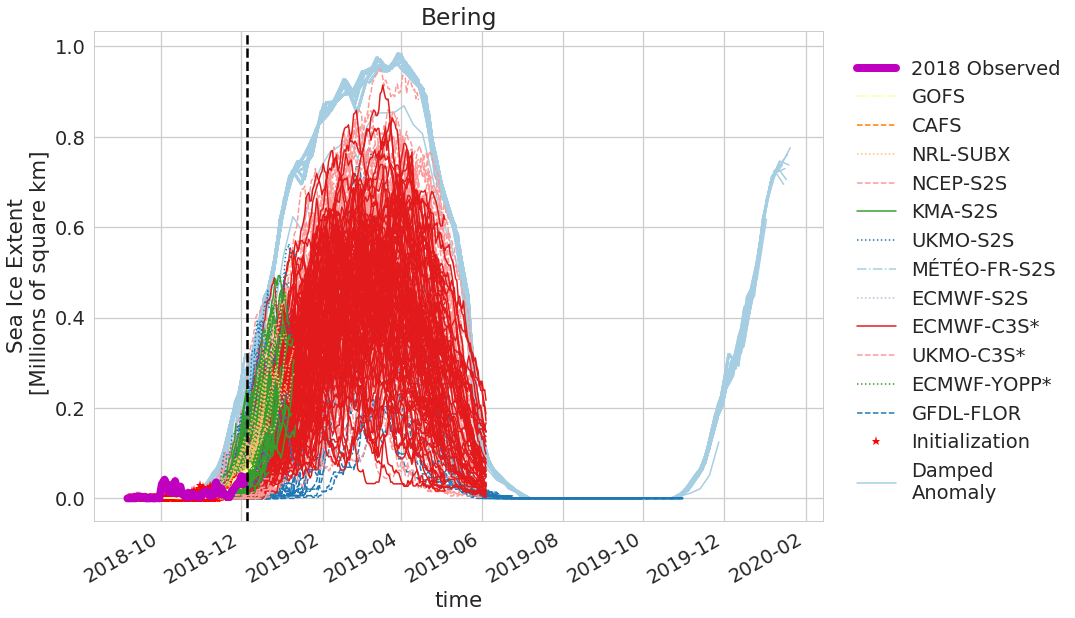

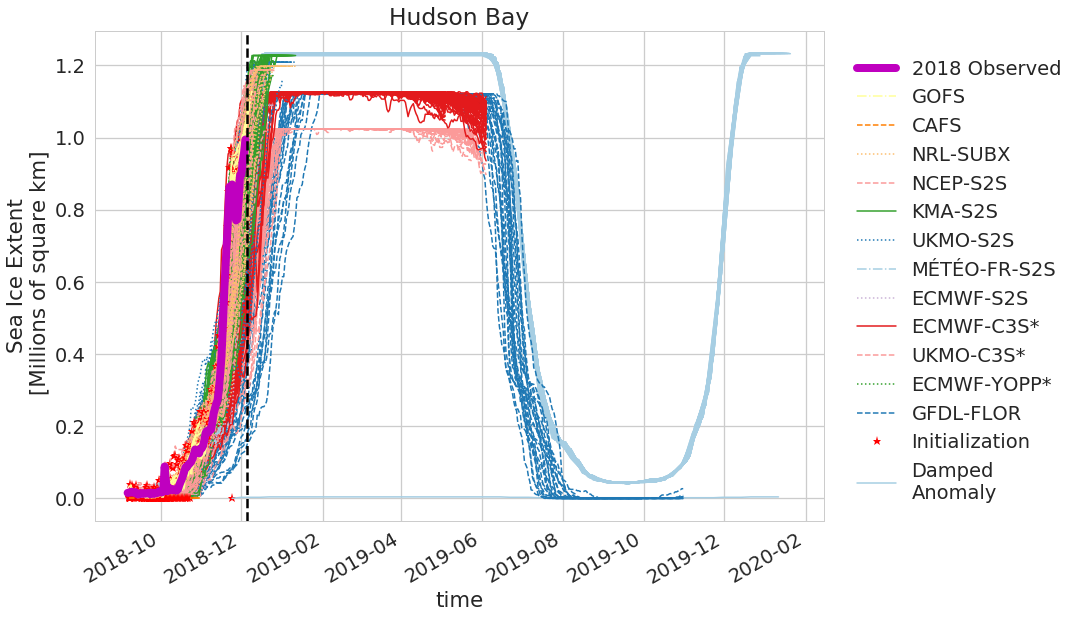

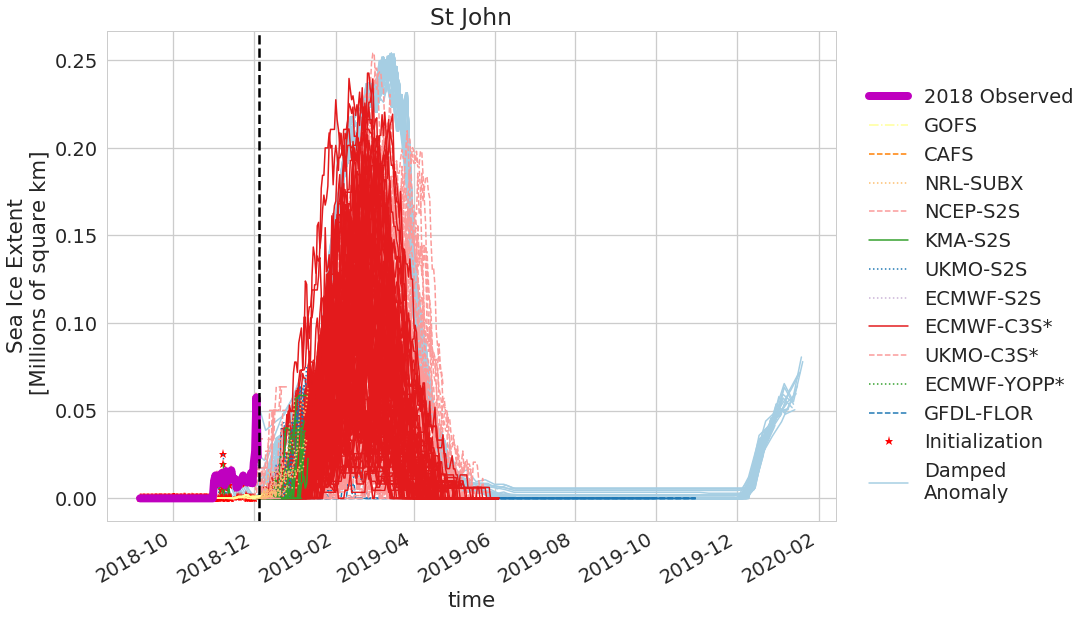

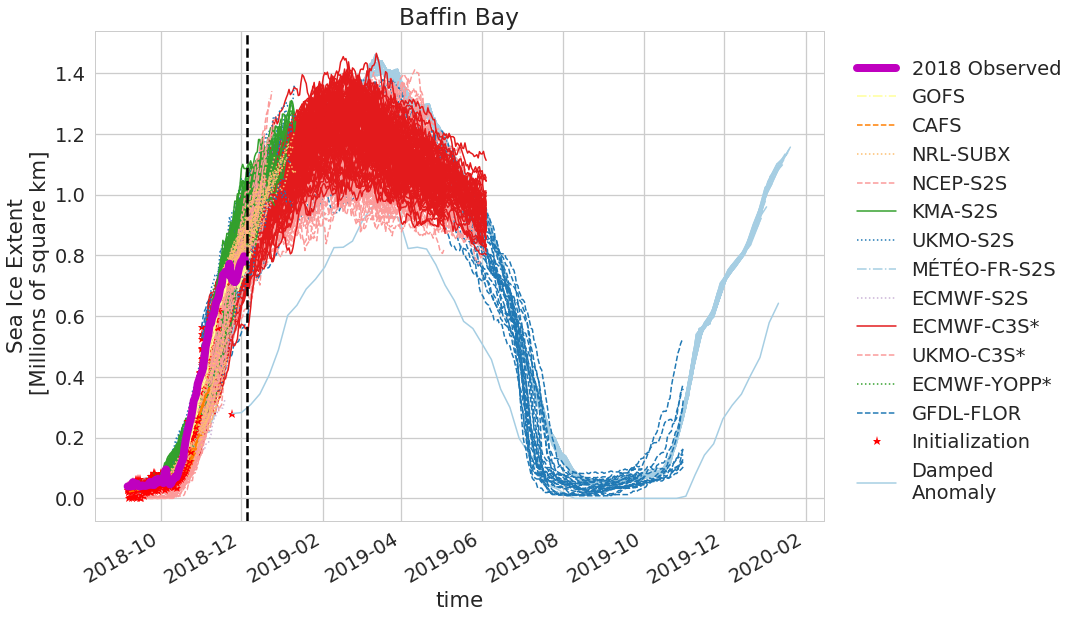

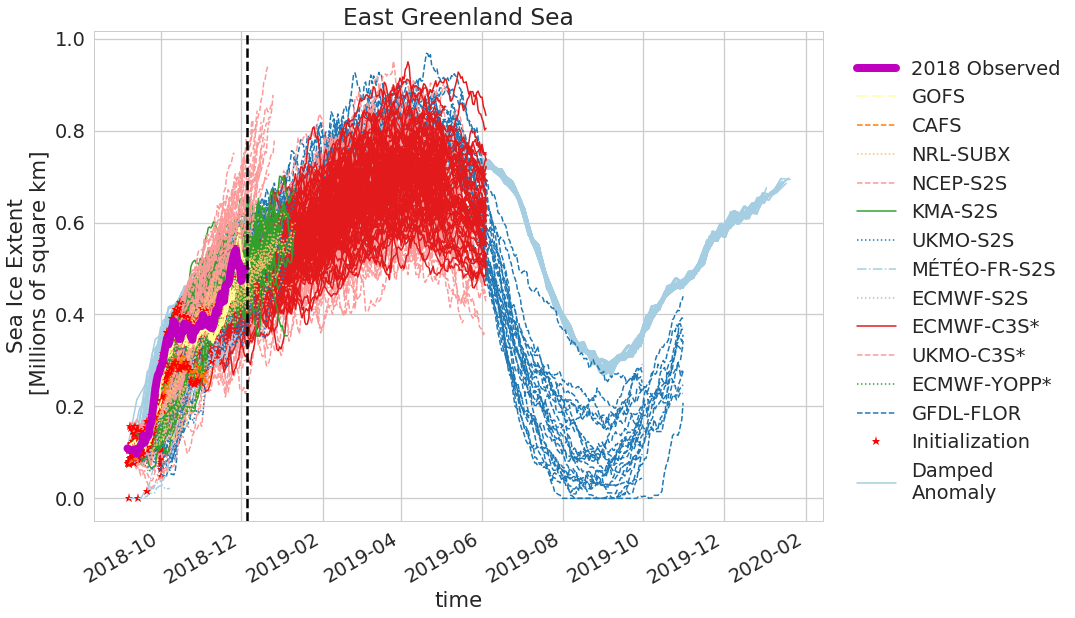

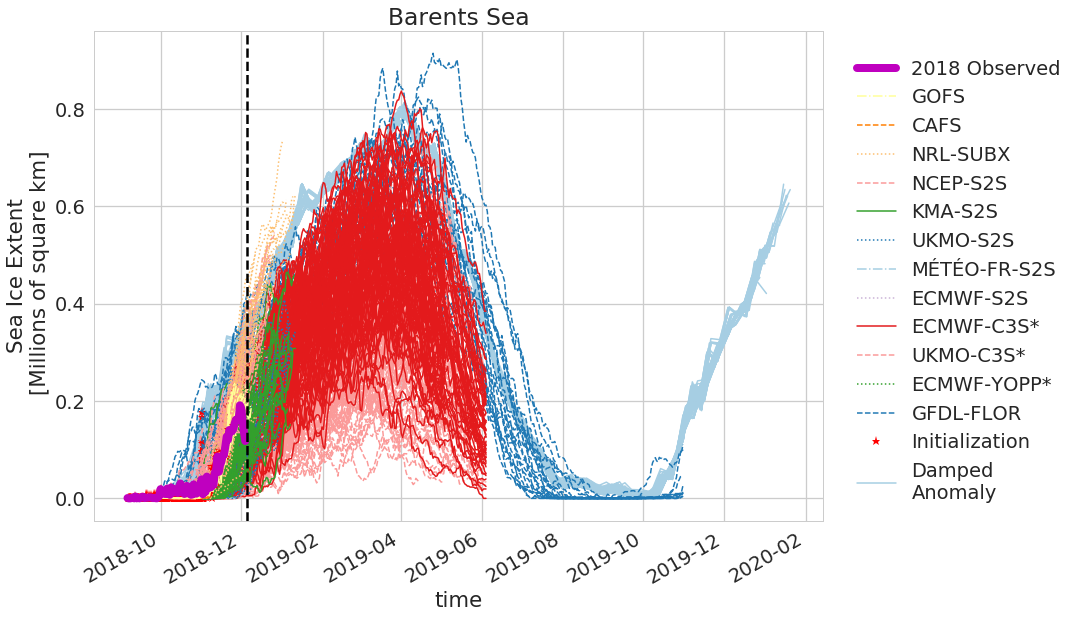

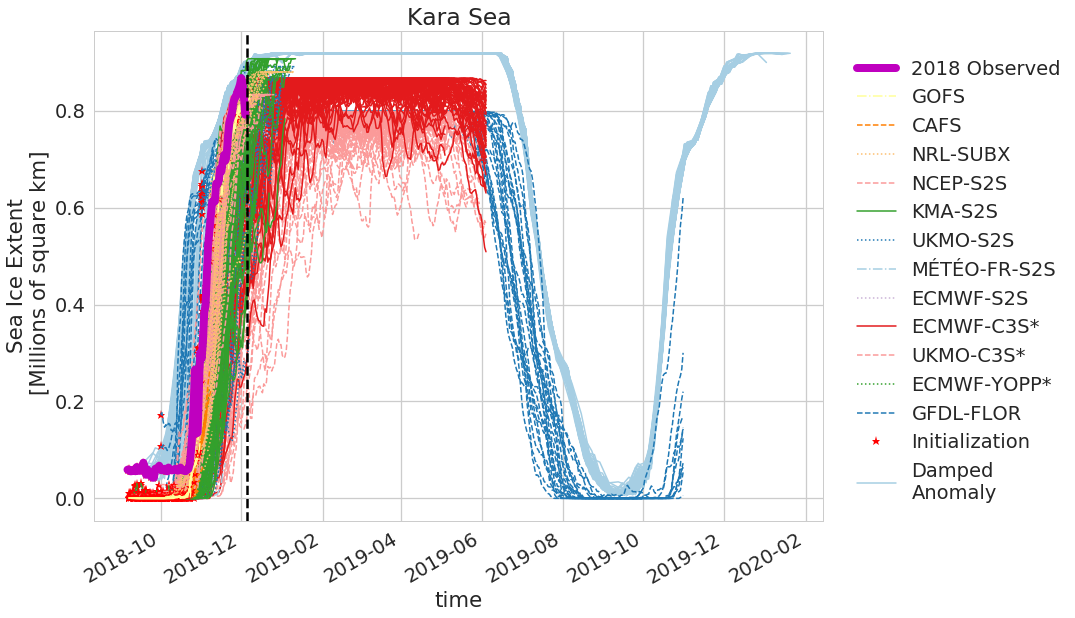

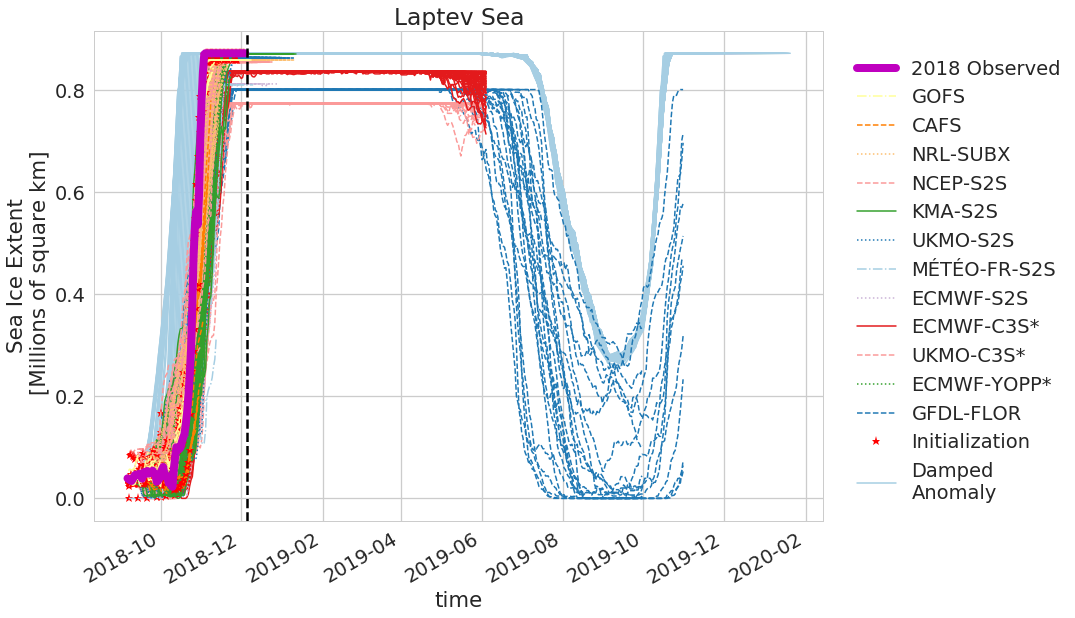

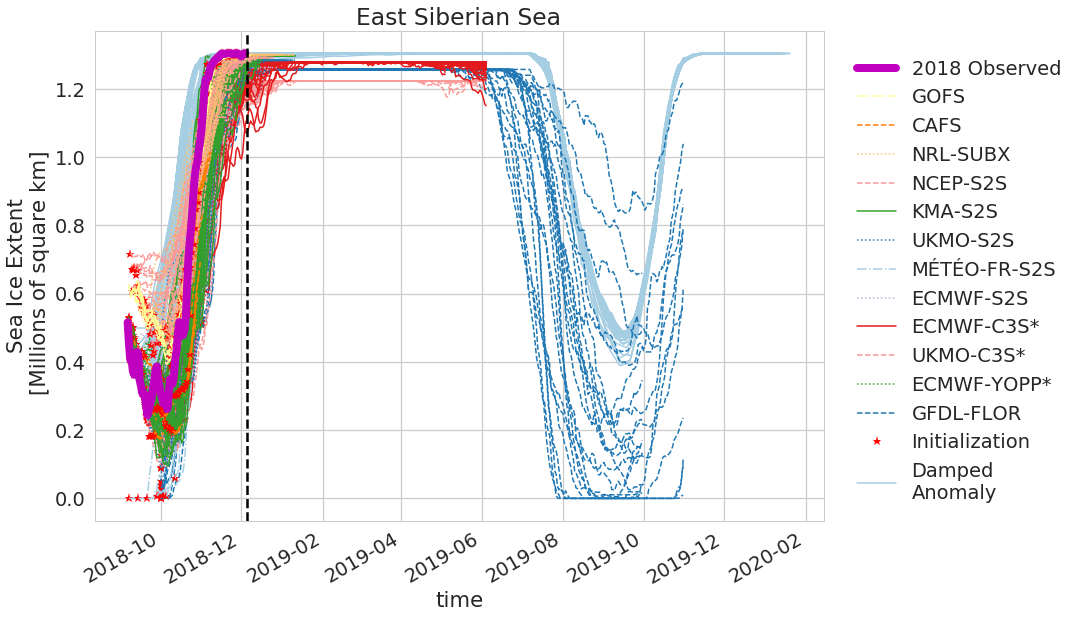

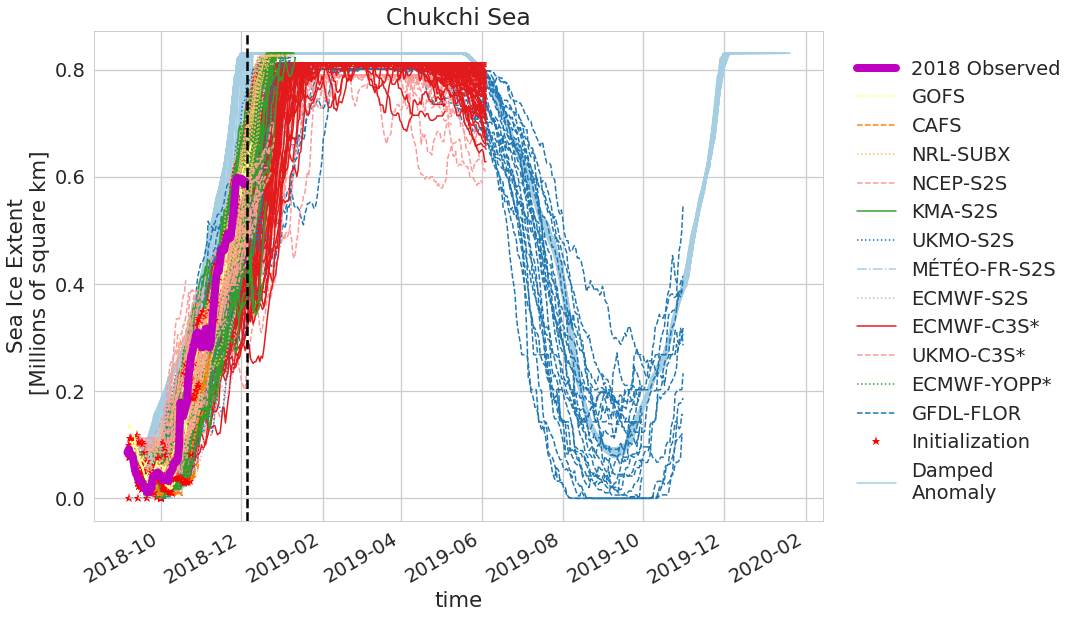

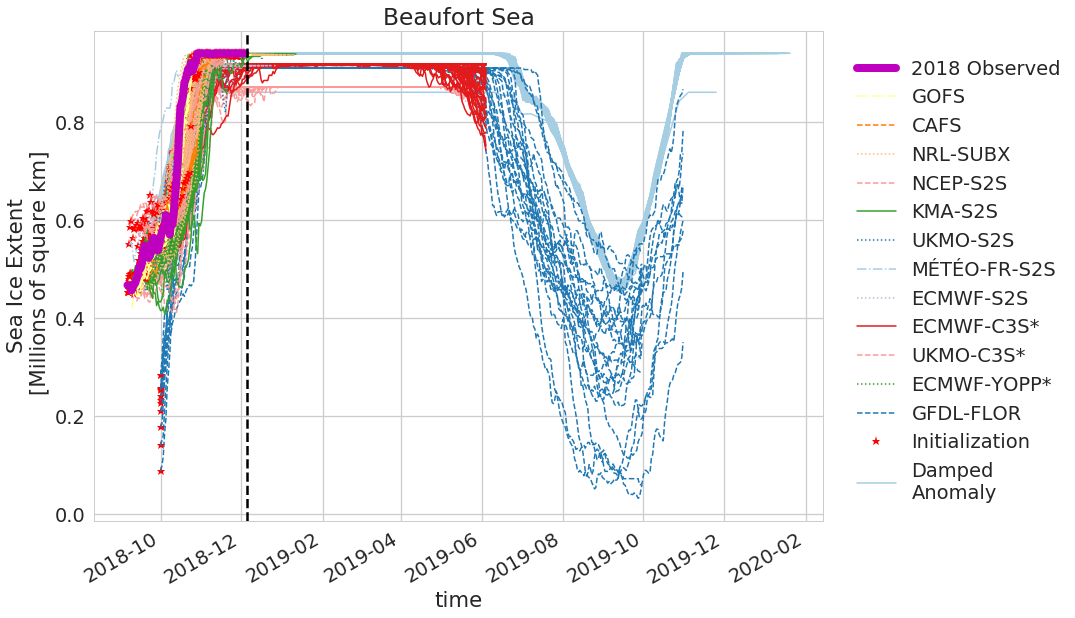

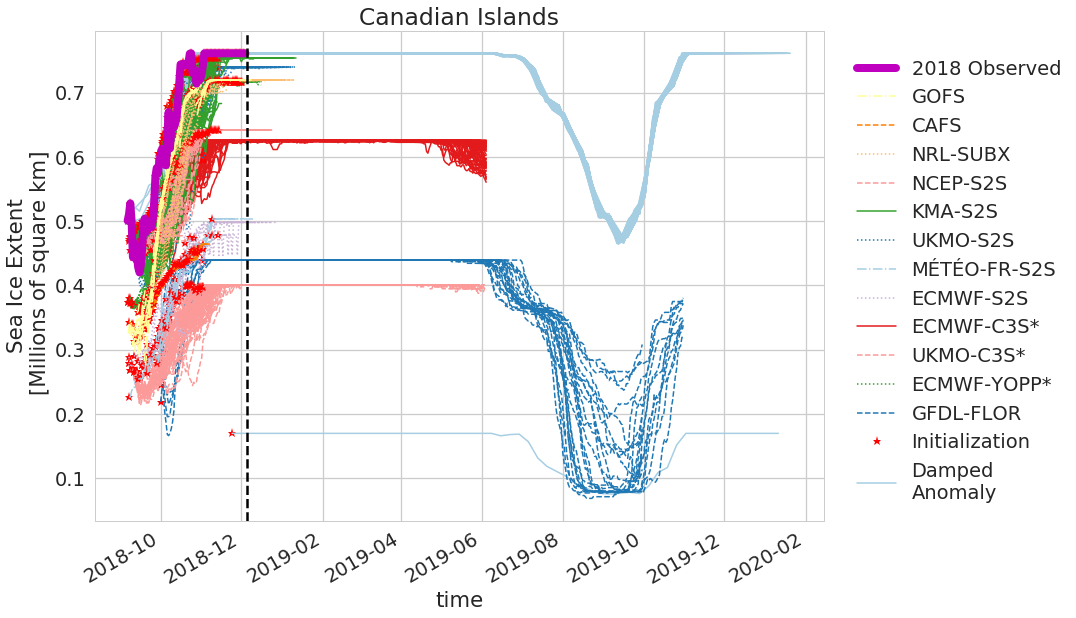

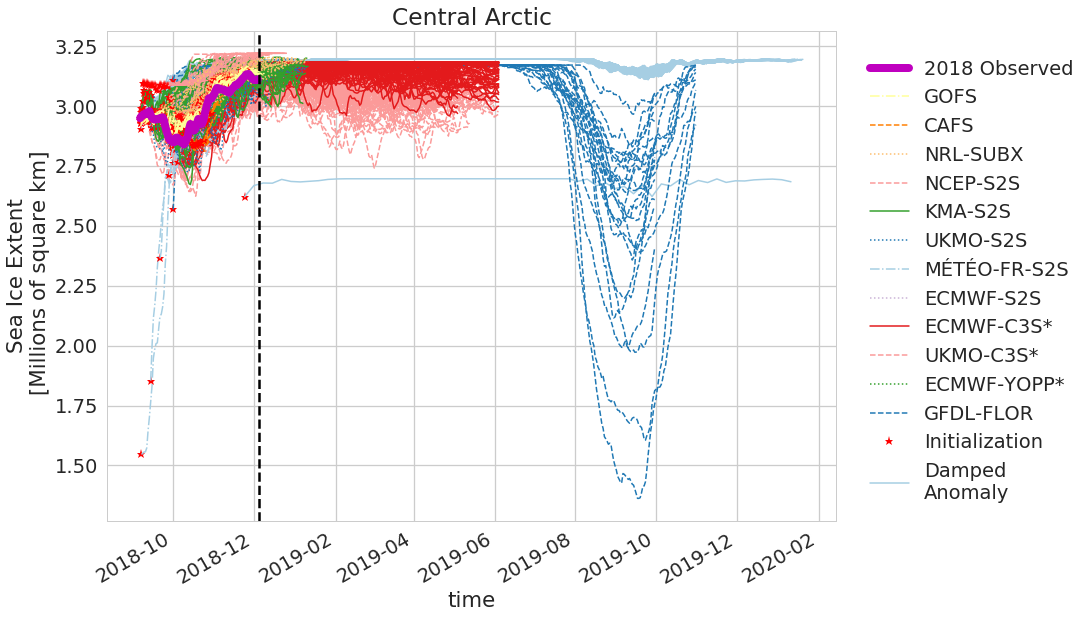

In [9]:
# cmap_c = itertools.cycle(sns.color_palette("Paired", len(E.model.keys()) ))
# linecycler = itertools.cycle(["-","--","-.",":","--"])
for cvar in variables:
    
    fig_dir = os.path.join(E.fig_dir, 'model', 'all_model', cvar, "regional_timeseries")
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)

    # For each region
    for cR in ds_region.ocean_regions.values:    
        cR_name = ds_region.region_names.sel(nregions=cR).item(0)
        print(cR_name)

        # New Plot
        f = plt.figure(figsize=(15,10))
        ax1 = plt.subplot(1, 1, 1) # Observations

        for (i, cmod) in enumerate(E.model.keys()):
#         for (i, cmod) in enumerate(['usnavyncep','usnavysipn']):

            if not E.icePredicted[cmod]:
                continue
            print(cmod)
            # Load in Model
            model_forecast = os.path.join(E.model[cmod][runType]['sipn_nc_agg'], '*.nc')

            # Check we have files 
            files = glob.glob(model_forecast)
            if not files:
                #print("Skipping model", cmod, "no forecast files found.")
                continue # Skip this model
            ds_model = xr.open_mfdataset(model_forecast, concat_dim='init_time',
                                         autoclose=True)

            # Get Extent
            ds_model = ds_model.Extent

            # Select init of interest
            ds_model = ds_model.where(ds_model.init_time>=np.datetime64(SD), drop=True)
            
#             # Take mean of ensemble
#             ds_model = ds_model.mean(dim='ensemble')

            # Select region
            ds_model = ds_model.sel(nregions=cR)

            # Get model plotting specs
            cc = E.model_color[cmod]
            cl = E.model_linestyle[cmod]

            # Plot Model
            if i == 1: # Control only one initiailzation label in legend
                no_init_label = False
            else:
                no_init_label = True
            import timeit
            start_time = timeit.default_timer()
            
            ice_plot.plot_reforecast(ds=ds_model, axin=ax1, 
                                 labelin=E.model[cmod]['model_label'],
                                 color=cc, marker=None,
                                 linestyle=cl,
                                 no_init_label=no_init_label)
            print( (timeit.default_timer() - start_time), ' seconds.' )

            # Memeory clean up
            ds_model = None     
            
                

        # Plot observations
        print('Plotting observations')
        ds_obs_reg = ds_obs.sic.where(ds_obs.time>=np.datetime64(SD), drop=True)
        ds_obs_reg = ds_obs_reg.where(ds_region.mask==cR)
        ds_obs_reg = ((ds_obs_reg >= 0.15).astype('int') * ds_region.area).sum(dim='x').sum(dim='y')/(10**6)
        ds_obs_reg.plot(ax=ax1, label=str(cdate.year)+' Observed', color='m', linewidth=8)
        ax1.set_ylabel('Sea Ice Extent\n [Millions of square km]')
        cxlims = ax1.get_xlim()
        

    #     # 1980-2010 Historical Interquartile Range
    #     plt.fill_between(ds_per_mean.time.values, ds_per_mean + ds_per_std, 
    #                  ds_per_mean - ds_per_std, alpha=0.35, label='1980-2010\nInterquartile Range', color='m')
        ax1.set_xlim(cxlims) # fix x limits
        cylims = ax1.get_ylim()

        # Plot current date line
        ax1.plot([cd, cd], [cylims[0], cylims[1]], color='k', linestyle='--')
        
        ax1.set_title(cR_name)

        # Add legend (static)
        handles, labels = ax1.get_legend_handles_labels()
        ax1.legend(handles[::-1], labels[::-1], loc='lower right',bbox_to_anchor=(1.35, 0))

        f.autofmt_xdate()
        ax1.set_ylim(cylims)
        plt.subplots_adjust(right=.8)

        # Save to file
        base_name_out = 'Region_'+cR_name.replace(" ", "_")+'_'+metric1+'_'+runType+'_raw_predicted'
        f_out = os.path.join(fig_dir, base_name_out+'.png')
        f.savefig(f_out,bbox_inches='tight',dpi=200)
        mpld3.save_html(f, os.path.join(fig_dir, base_name_out+'.html'))

        # Mem clean up
        ds_model = None
        ds_obs_reg = None
        f = None